<a href="https://colab.research.google.com/github/apoorwagupta/Digital_Image_Processing/blob/main/Project%20-Classification%20of%20tumors%20from%20the%20breast%20cancer%20ultrasound%20images/DIPpart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
# importing libraries
import numpy as np
import cv2
import os 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loaded data
image_names=[]
output=[]
labels=[]
benign = 0
malignant = 0
#define classes
classes={'Benign':0,"Malignant":1}  
for name in classes:
    address='/content/drive/MyDrive/dipdataset/'+name
    for add in os.listdir(address):
            image = cv2.imread(address+'/'+add)
            image = cv2.resize(image, (128,128))
            image = cv2.normalize(image, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype =cv2.CV_8U)
            image_names.append(image)
            output.append(classes[name])
            if classes[name] == 0:
                benign = benign+1
            if classes[name] == 1:
                malignant = malignant + 1
            labels.append(name)

In [ ]:
os.listdir(address)

['malignant (101).png',
 'malignant (1).png',
 'malignant (10).png',
 'malignant (100).png',
 'malignant (102).png',
 'malignant (110).png',
 'malignant (113).png',
 'malignant (107).png',
 'malignant (116).png',
 'malignant (105).png',
 'malignant (104).png',
 'malignant (117).png',
 'malignant (119).png',
 'malignant (12).png',
 'malignant (121).png',
 'malignant (111).png',
 'malignant (11).png',
 'malignant (109).png',
 'malignant (108).png',
 'malignant (106).png',
 'malignant (112).png',
 'malignant (120).png',
 'malignant (103).png',
 'malignant (115).png',
 'malignant (114).png',
 'malignant (118).png',
 'malignant (123).png',
 'malignant (13).png',
 'malignant (131).png',
 'malignant (128).png',
 'malignant (130).png',
 'malignant (126).png',
 'malignant (137).png',
 'malignant (136).png',
 'malignant (138).png',
 'malignant (129).png',
 'malignant (135).png',
 'malignant (122).png',
 'malignant (124).png',
 'malignant (133).png',
 'malignant (134).png',
 'malignant (132).png'

In [ ]:
# number of images 
print("Benign Images :",benign)
print("Malignant Images :",malignant)
print("length of data =",len(image_names), "files=", len(output), "labels=",len(labels))

Benign Images : 447
Malignant Images : 210
length of data = 657 files= 657 labels= 657


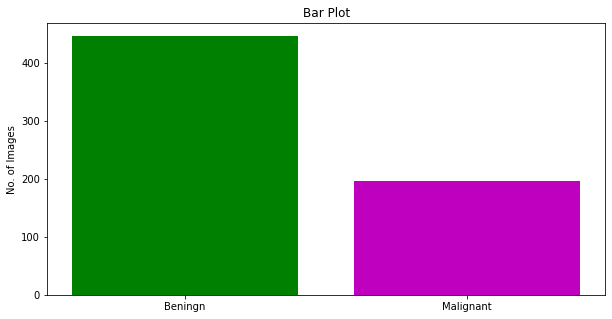

In [ ]:
# plot the bar graph for number of benign and malignant images
fig = plt.figure(figsize = (10, 5))
k1=0
k2=0
for i in range (0,643):
    if output[i]==0:
        k1+=1
    else:
        k2+=1
plt.bar([0,1],[k1,k2], color = ['g','m'])
plt.xticks([0,1], ['Beningn', 'Malignant'])
plt.ylabel("No. of Images")
plt.title("Bar Plot") 
plt.show()

In [ ]:
## function to plot sample images
def sample_images(images,gray = False):
    figure, axes = plt.subplots(1, 4)
    figure.set_size_inches(35,25)
    axes[0].imshow(images[1],cmap='gray') if gray else axes[0].imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))
    axes[0].title.set_text("Benign")
    axes[0].axis('off')
    axes[1].imshow(images[55],cmap='gray') if gray else axes[1].imshow(cv2.cvtColor(images[55], cv2.COLOR_BGR2RGB))
    axes[1].title.set_text("Benign")
    axes[1].axis('off')
    axes[2].imshow(images[450],cmap='gray') if gray else axes[2].imshow(cv2.cvtColor(images[450], cv2.COLOR_BGR2RGB))
    axes[2].axis('off')
    axes[2].title.set_text("Malignant")
    axes[3].imshow(images[451],cmap='gray') if gray else axes[3].imshow(cv2.cvtColor(images[451], cv2.COLOR_BGR2RGB))
    axes[3].axis('off')
    axes[3].title.set_text("Malignant")
    plt.show()

In [ ]:
# function to find the histogram of images
def hist(I):       #2D
    if len(I.shape)>2:
        I=cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
    H=np.zeros((256,1))
    for x in np.nditer(I):
        if x>255:
            x=255
        elif x<0:
            x=0
        H[int(x)]=H[int(x)]+1
    return H

In [ ]:
## look for image shape and type of input images
input_images = image_names
print(np.array(input_images).shape)
print(input_images[10].dtype)

(657, 128, 128, 3)
uint8


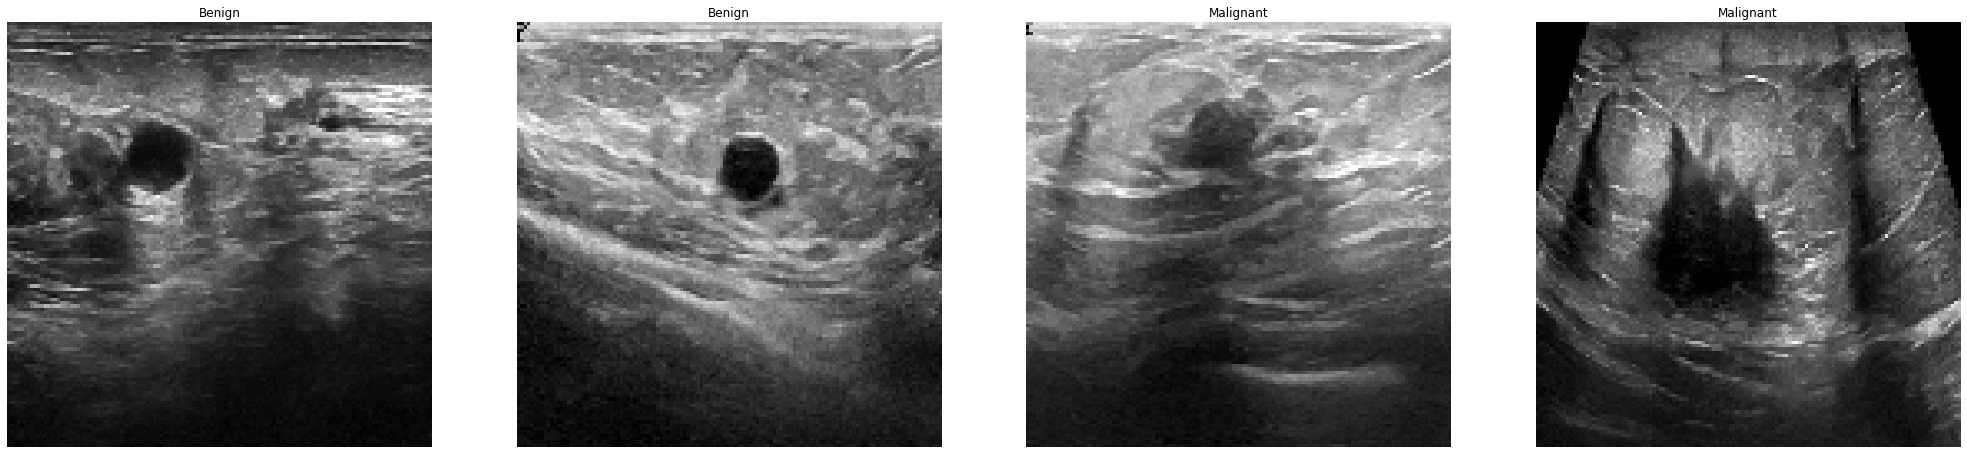

In [ ]:
## plot the sample images
sample_images(input_images)

## Image Preprocessing

### Grayscale Image

657


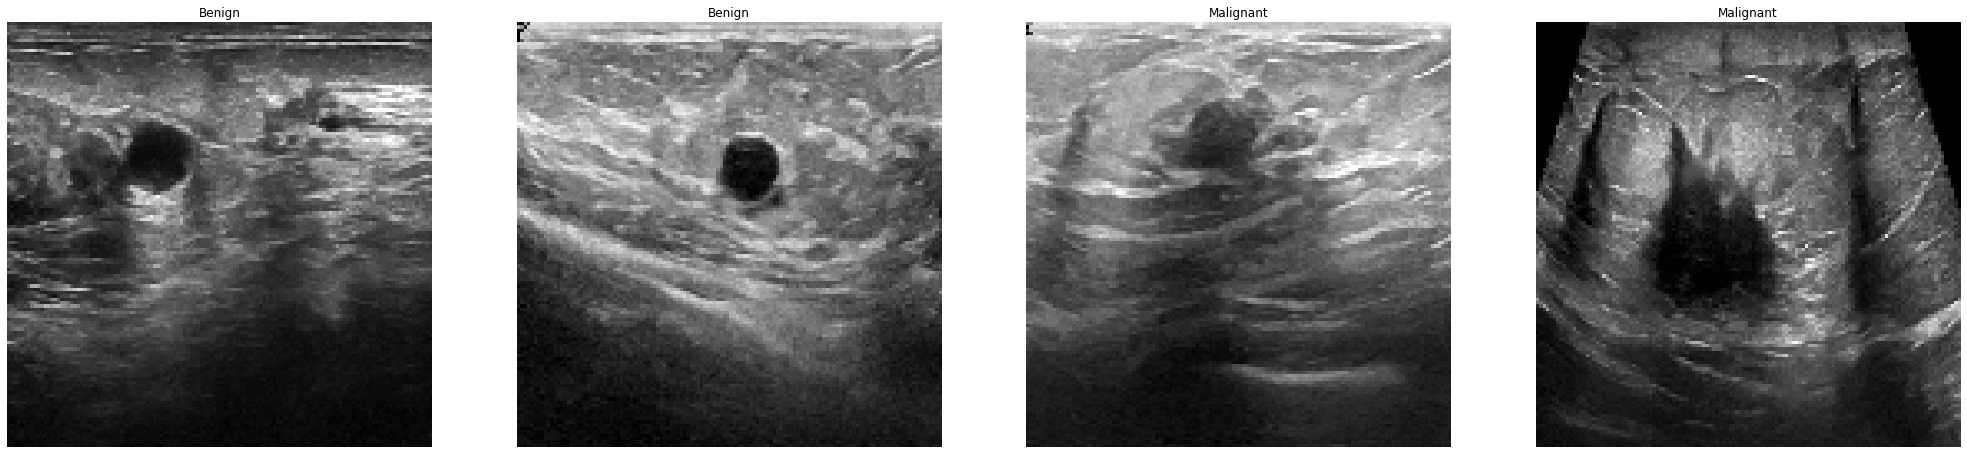

In [ ]:
# convert the RBG images to gray scale images
grayscale_images = []
grayscale_images.clear()
for idx, image in enumerate(input_images,1):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    grayscale_images.append(gray_image)
print(idx)    
sample_images(grayscale_images)

Text(0.5, 1.0, 'histogram for malignant')

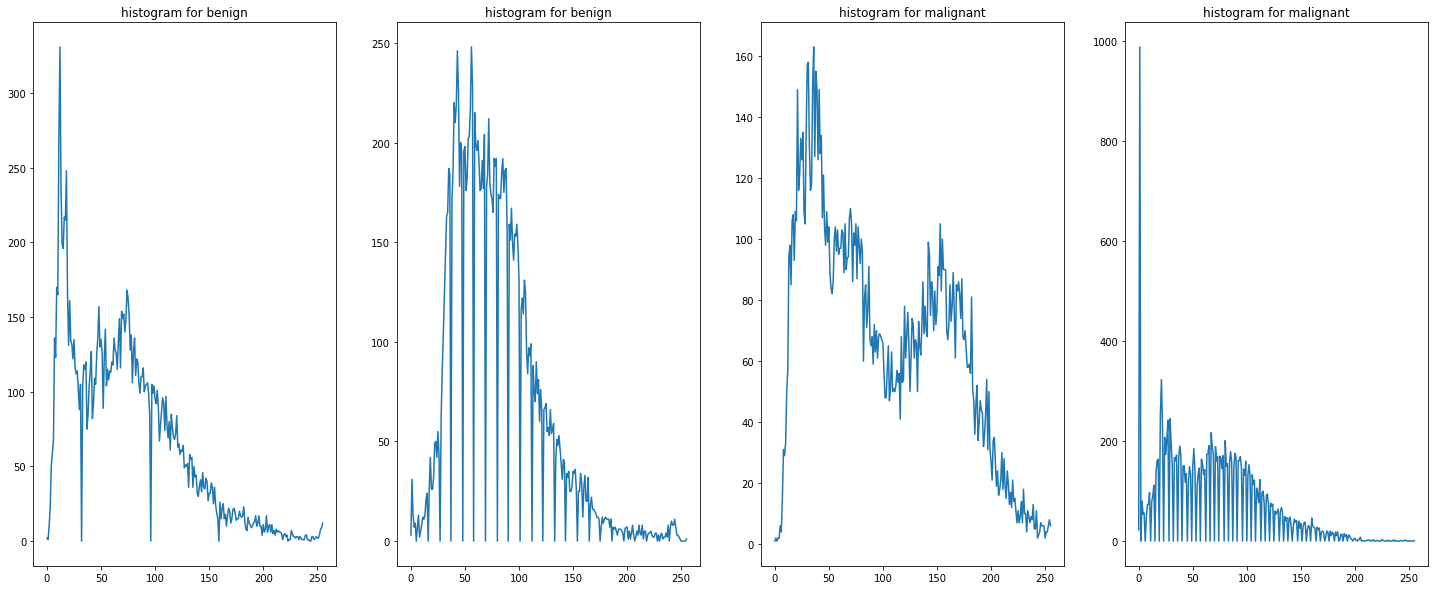

In [ ]:
## plot for histogram equalization
fig = plt.figure(figsize=[25,10])
plt.subplot(1,4,1)
plt.plot(hist(grayscale_images[1]))
plt.title('histogram for benign')
plt.subplot(1,4,2)
plt.plot(hist(grayscale_images[50]))
plt.title('histogram for benign')
plt.subplot(1,4,3)
plt.plot(hist(grayscale_images[450]))
plt.title('histogram for malignant')
plt.subplot(1,4,4)
plt.plot(hist(grayscale_images[451]))
plt.title('histogram for malignant')

### Histogram Equalization

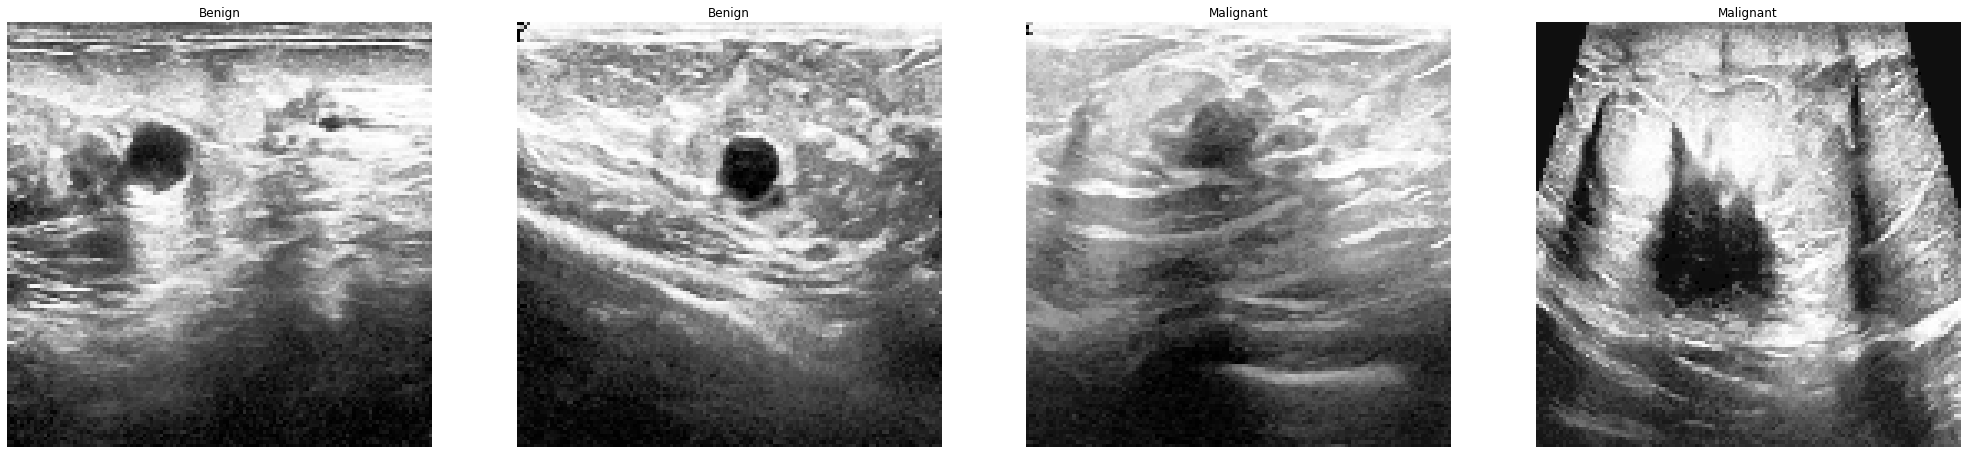

In [ ]:
# histogram equalization on gray scale images
eqhist_images=[]
eqhist_images.clear()
for idx, image in enumerate(grayscale_images):
    eqhistimage = cv2.equalizeHist(image)
    eqhist_images.append(eqhistimage)
sample_images(eqhist_images, True)

Text(0.5, 1.0, 'histogram for malignant')

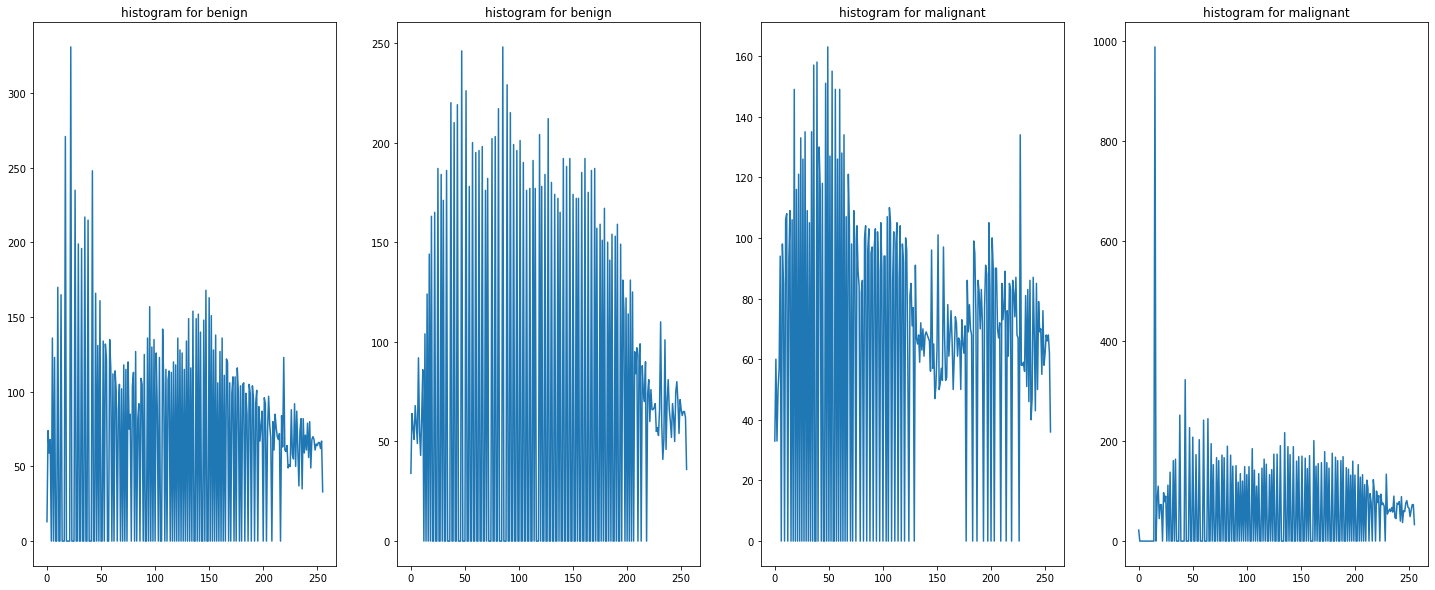

In [ ]:
# plot the histogram after histogram operation
fig = plt.figure(figsize=[25,10])
plt.subplot(1,4,1)
plt.plot(hist(eqhist_images[1]))
plt.title('histogram for benign')
plt.subplot(1,4,2)
plt.plot(hist(eqhist_images[50]))
plt.title('histogram for benign')
plt.subplot(1,4,3)
plt.plot(hist(eqhist_images[450]))
plt.title('histogram for malignant')
plt.subplot(1,4,4)
plt.plot(hist(eqhist_images[451]))
plt.title('histogram for malignant')

### Bilateral Filter

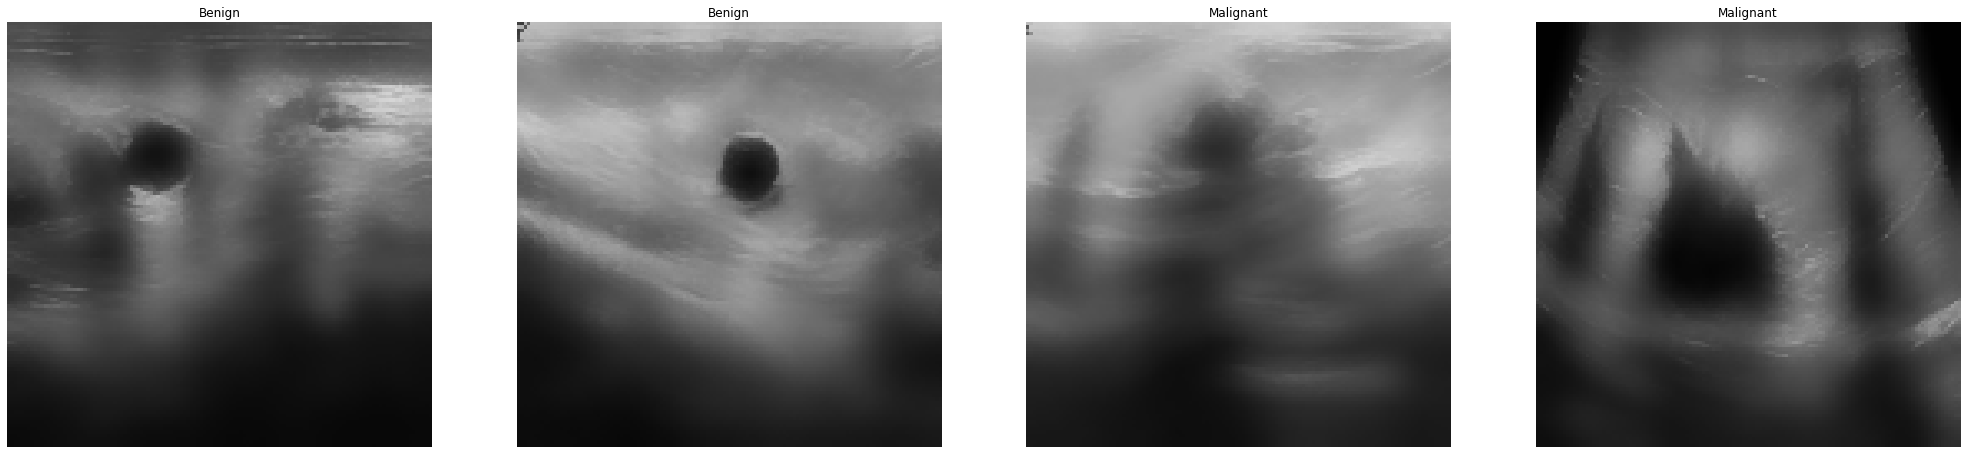

In [ ]:
## Applying bilateral filter on grayscale images
bilateral_images = []
bilateral_images.clear()
for idx, image in enumerate(grayscale_images):
    bilateral = cv2.bilateralFilter(image, 15, 75, 75)
    bilateral_images.append(bilateral)
sample_images(bilateral_images)

Text(0.5, 1.0, 'histogram for malignant')

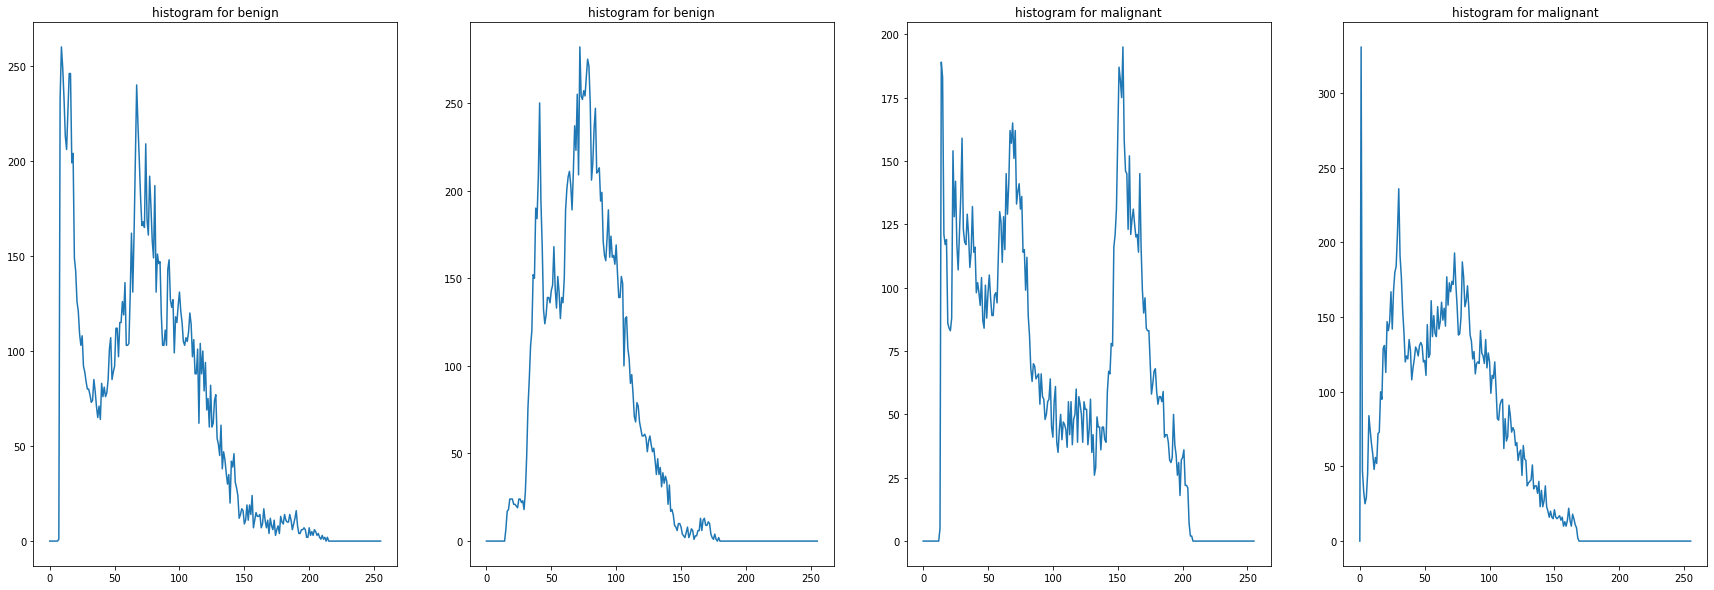

In [ ]:
## plot the histogram of bilateral filter
fig = plt.figure(figsize=[30,10])
plt.subplot(1,4,1)
plt.plot(hist(bilateral_images[1]))
plt.title('histogram for benign')
plt.subplot(1,4,2)
plt.plot(hist(bilateral_images[50]))
plt.title('histogram for benign')
plt.subplot(1,4,3)
plt.plot(hist(bilateral_images[450]))
plt.title('histogram for malignant')
plt.subplot(1,4,4)
plt.plot(hist(bilateral_images[451]))
plt.title('histogram for malignant')

### CLAHE

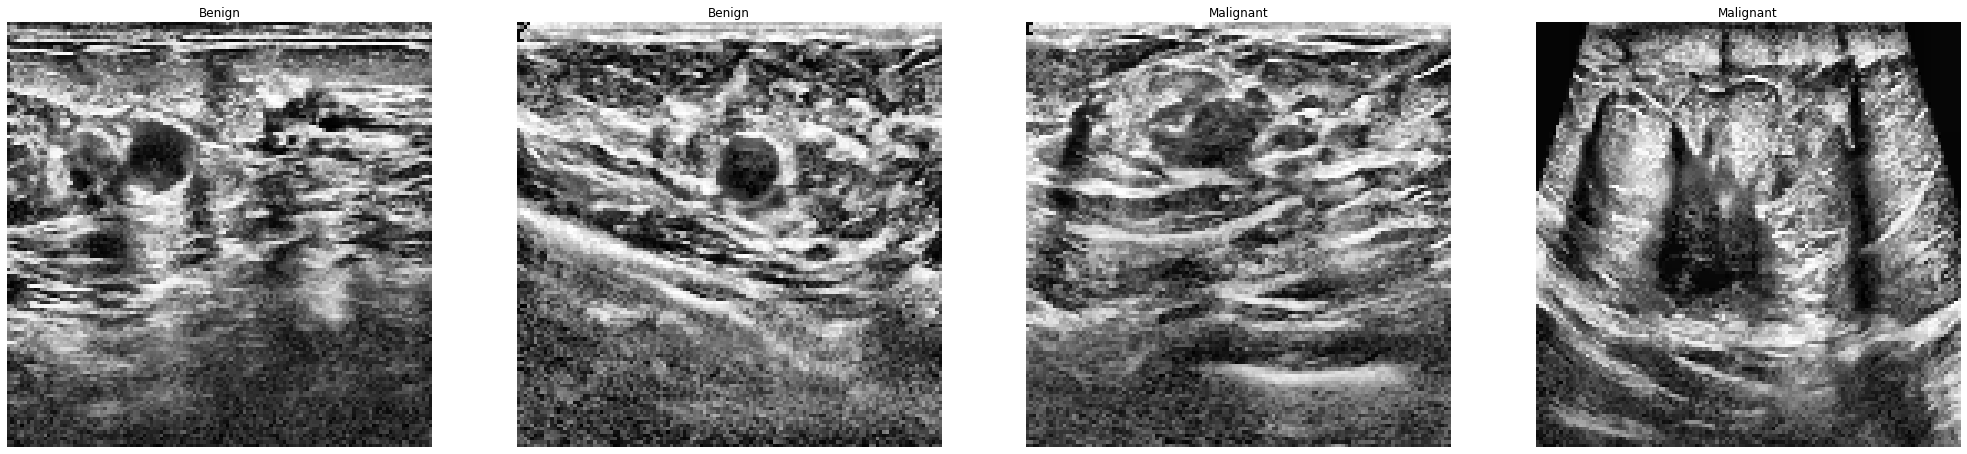

In [ ]:
# applying clahe on grayscale images
Clahe_images=[]
Clahe_images.clear()
for idx, image in enumerate(grayscale_images):
    #R, G, B = cv2.split(image)
    
    clahe = cv2.createCLAHE(clipLimit = 5)
    clahe_img = clahe.apply(image) 
    Clahe_images.append(clahe_img)
sample_images(Clahe_images, True)

Text(0.5, 1.0, 'histogram for malignant')

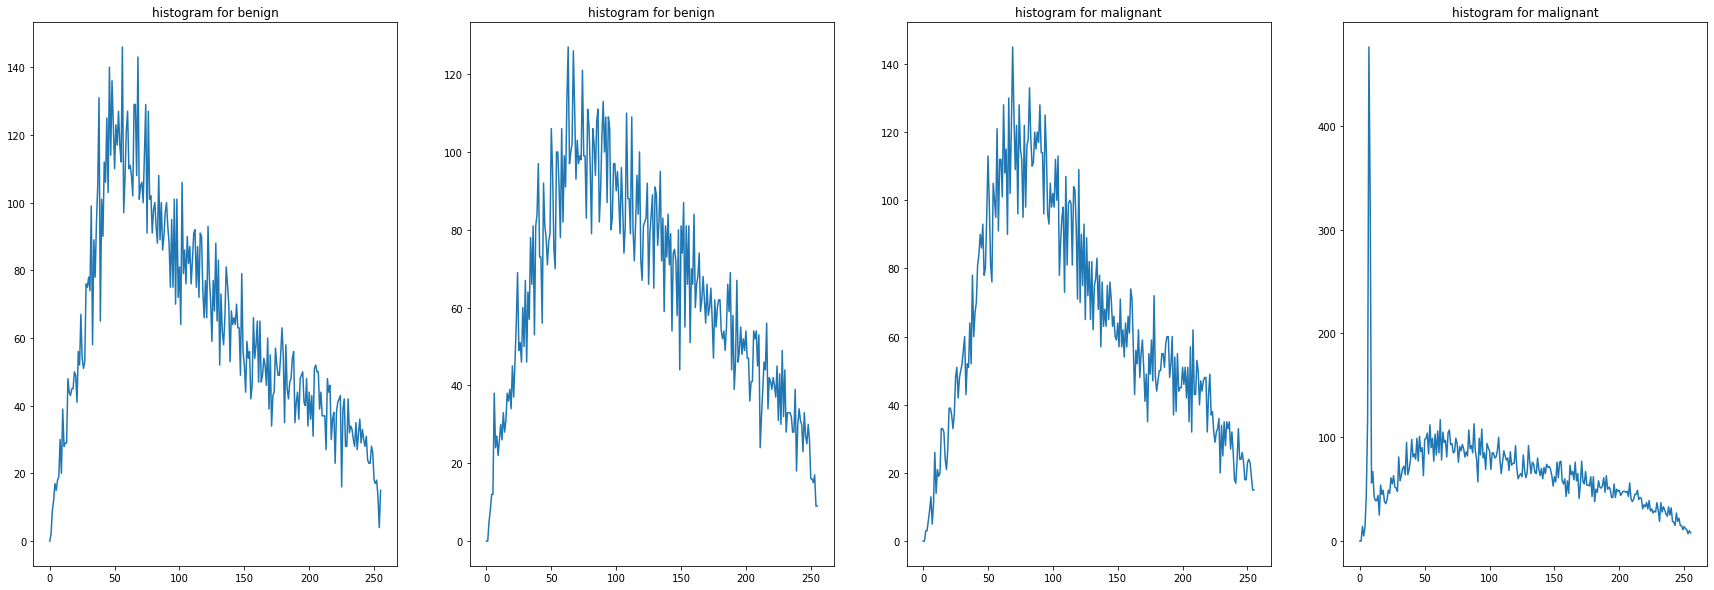

In [ ]:
# plot the histogram after clahe operation
fig = plt.figure(figsize=[30,10])
plt.subplot(1,4,1)
plt.plot(hist(Clahe_images[1]))
plt.title('histogram for benign')
plt.subplot(1,4,2)
plt.plot(hist(Clahe_images[50]))
plt.title('histogram for benign')
plt.subplot(1,4,3)
plt.plot(hist(Clahe_images[450]))
plt.title('histogram for malignant')
plt.subplot(1,4,4)
plt.plot(hist(Clahe_images[451]))
plt.title('histogram for malignant')

### Otsu Binarization

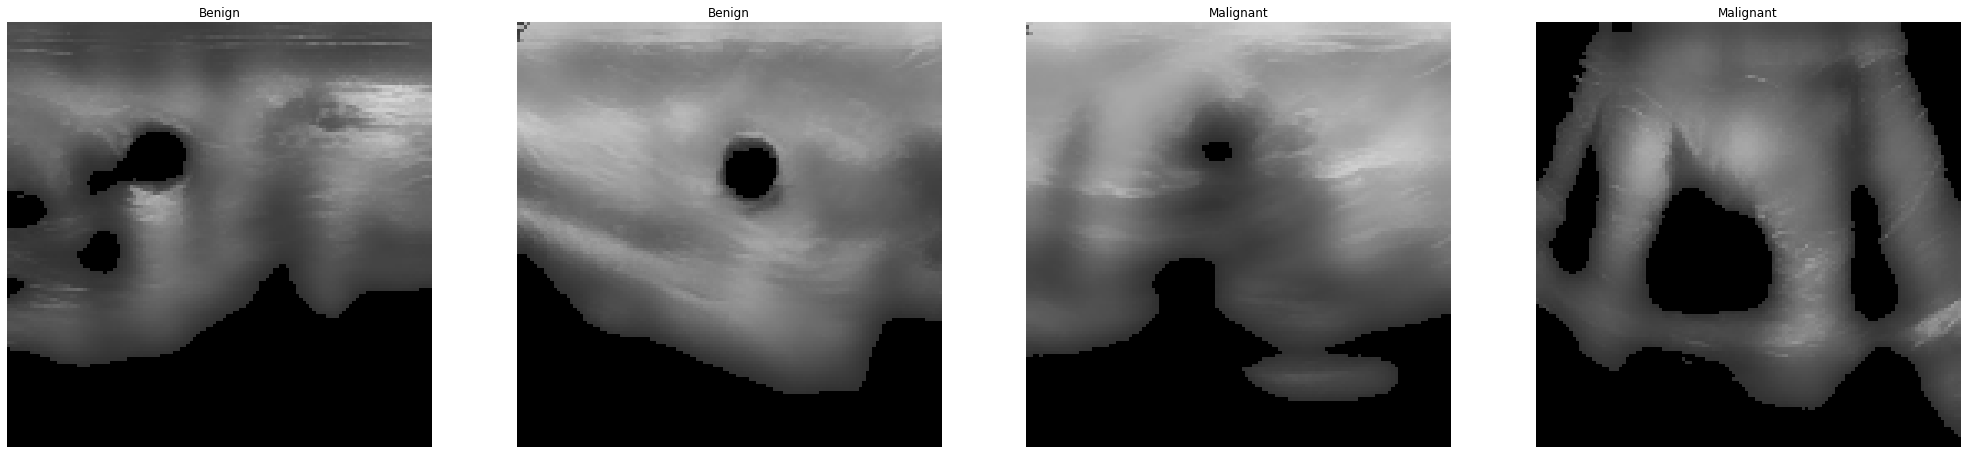

In [ ]:
thresholded=[]
thresholded.clear()
for image in bilateral_images:
    thresh, binaryImg = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU)
    ret, image = cv2.threshold(image,thresh-20,255,cv2.THRESH_TOZERO)
    thresholded.append(image)
#(np.array(thresholded)).shape
sample_images(thresholded)


### Adaptive_Threshold¶

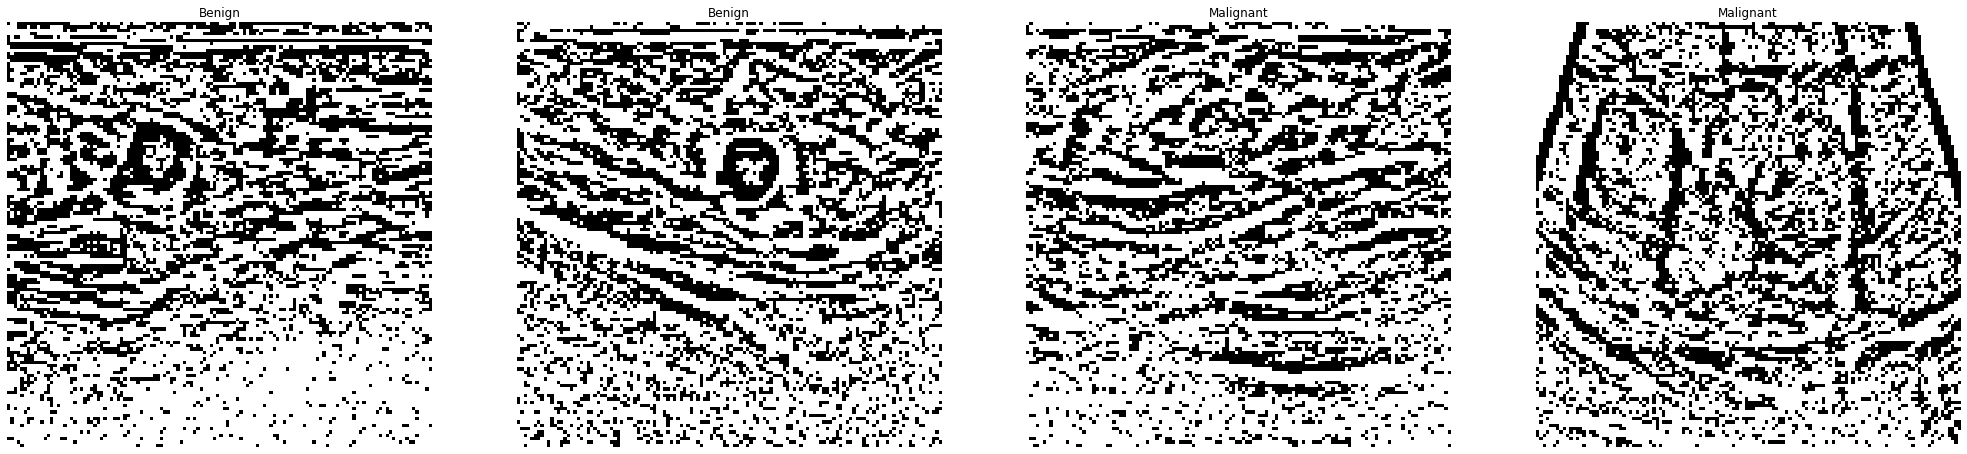

In [ ]:
# Applied threshold to zero inversion
thresholded_images=[]
thresholded_images.clear()
for idx, image in enumerate(grayscale_images):
    image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 5)
    thresholded_images.append(image)
sample_images(thresholded_images, True)

## Edge Detection

### Sobel Edge Detection

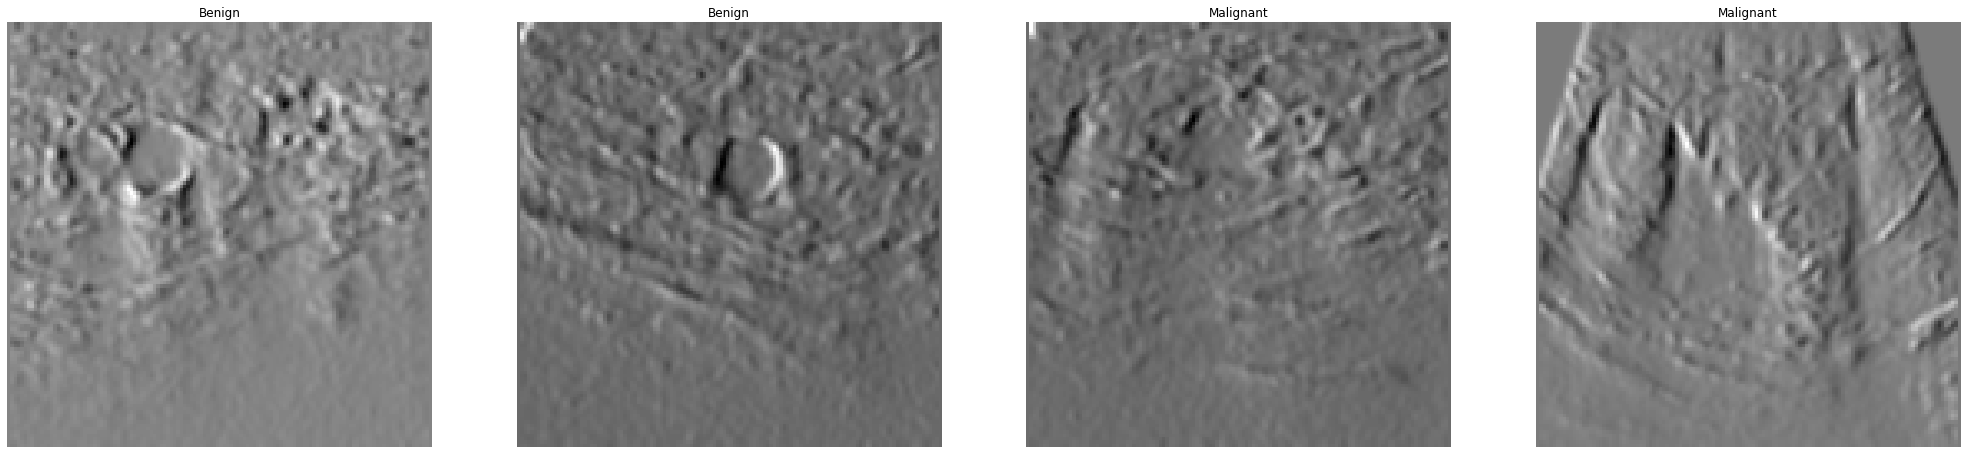

In [ ]:
# Using sobel filter on grayscale images
x_edged_images=[]
x_edged_images.clear()
for idx, image in enumerate(grayscale_images):
    sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
    x_edged_images.append(sobelx)
sample_images(x_edged_images, True)

### Conny Edge Detection

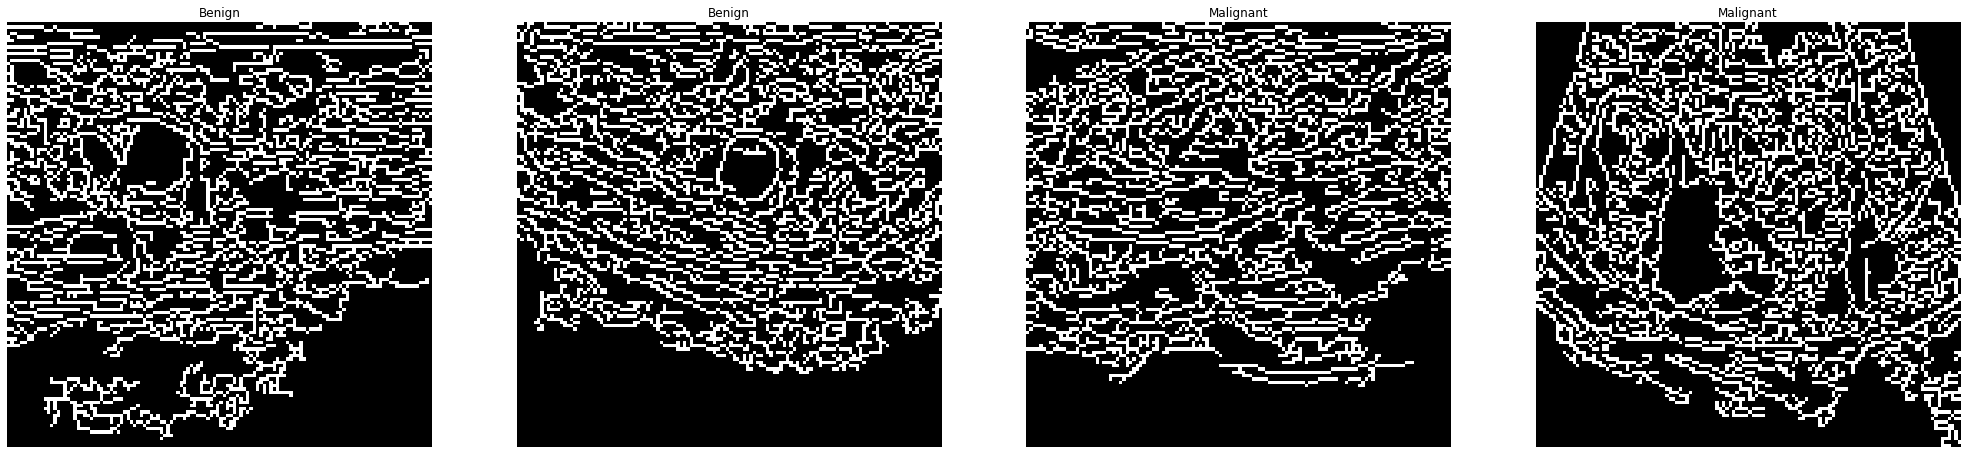

In [ ]:
conny_edged_images=[]
conny_edged_images.clear()
for idx, image in enumerate(input_images):
    image = cv2.Canny(image,10,200)
    conny_edged_images.append(image)
sample_images(conny_edged_images, True)

## Morphological Operations

### Erosion

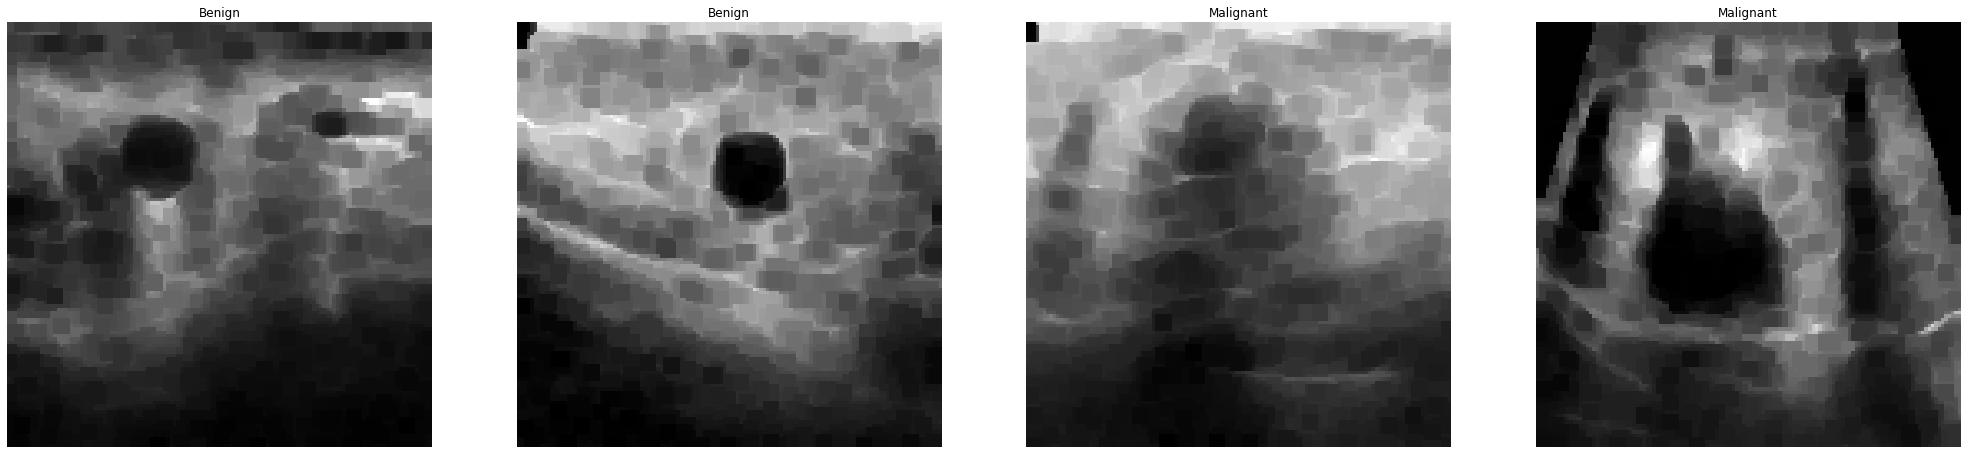

In [ ]:
ero_images = []
ero_images.clear()
kernel = np.ones((5,5),np.uint8)
for idx, image in enumerate(grayscale_images):
    
    erosion = cv2.erode(image,kernel,iterations = 1)
    ero_images.append(erosion)
sample_images(ero_images, True)

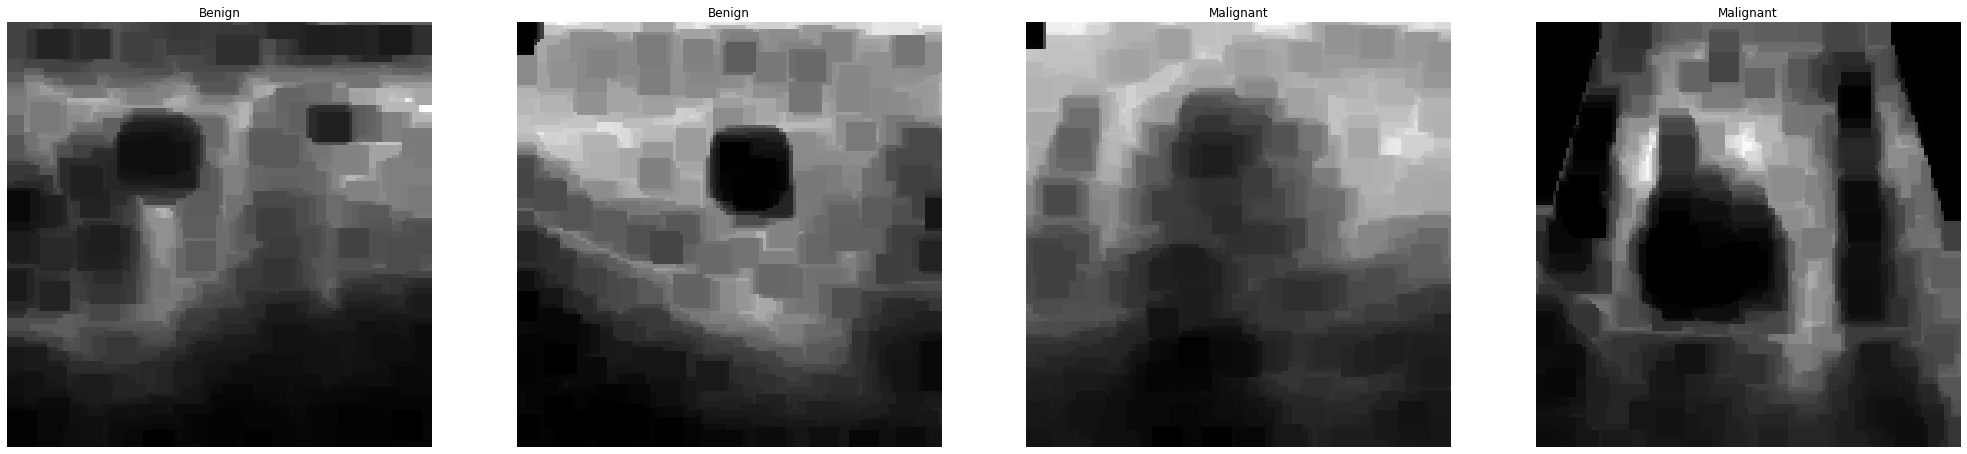

In [ ]:
ero_images = []
ero_images.clear()
kernel = np.ones((3,3),np.uint8)
for idx, image in enumerate(grayscale_images):
    
    erosion = cv2.erode(image,kernel,iterations = 2)
    dilation = cv2.dilate(erosion,kernel,iterations = 1)
    erosion = cv2.erode(dilation,kernel,iterations = 2)
    dilation = cv2.dilate(erosion,kernel,iterations = 1)
    erosion = cv2.erode(dilation,kernel,iterations = 2)
    ero_images.append(erosion)
sample_images(ero_images, True)

## Dilation

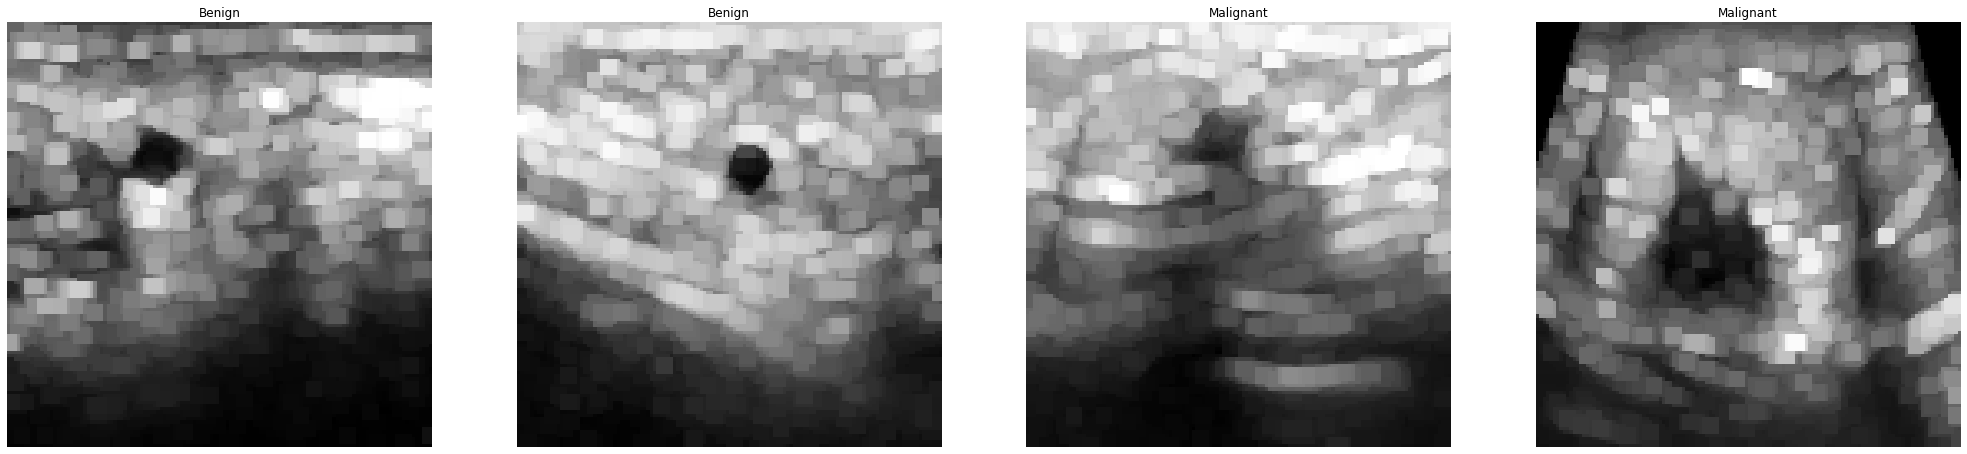

In [ ]:
dilation_images = []
dilation_images.clear()
kernel = np.ones((5,5),np.uint8)
for idx, image in enumerate(grayscale_images):
    dilation = cv2.dilate(image,kernel,iterations = 1)
    dilation_images.append(dilation)
sample_images(dilation_images, True)

## Calculation Statistical and GLCM Features

In [ ]:
from skimage.feature import greycomatrix, greycoprops

In [ ]:
# calculating the GLCM features
Energy = [];Correlation = [];Dissimilarity = [];Homogenity = [];Contrast = [];Entropy = []

def energy(img):
            img = np.array(img)
            GLCM = greycomatrix(img, [1], [0])       
            return greycoprops(GLCM, 'energy')[0]
def correlation(img):
            img = np.array(img)
            GLCM = greycomatrix(img, [1], [0])      
            return greycoprops(GLCM, 'correlation')[0]
def dissimilarity(img):
            img = np.array(img)
            GLCM = greycomatrix(img, [1], [0])       
            return  greycoprops(GLCM, 'dissimilarity')[0]
def homogenity(img):
            img = np.array(img)
            GLCM = greycomatrix(img, [1], [0])       
            return  greycoprops(GLCM, 'homogeneity')[0]
def contrast(img):
            img = np.array(img)
            GLCM = greycomatrix(img, [1], [0])   
            return greycoprops(GLCM, 'contrast')[0]
def entropy(img):
            img = np.array(img)
            GLCM = greycomatrix(img, [1], [0])   
            return greycoprops(GLCM, 'entropy')[0]        
for img in input_images:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    Energy.append(energy(img)[0])
    Correlation.append(correlation(img)[0])
    Dissimilarity.append(dissimilarity(img)[0])
    Homogenity.append(homogenity(img)[0])
    Contrast.append(contrast(img)[0])
    Entropy.append(contrast(img)[0]) 

In [ ]:
## mean and standard deviation of grayscale images
gray_mean=[]
gray_std_dev=[]
gray_mean.clear()
gray_std_dev.clear()
for idx, image in enumerate(grayscale_images):
    mean = np.mean(image)
    std_dev = np.std(image)
    gray_mean.append(mean)
    gray_std_dev.append(std_dev)

In [ ]:
## calculating mean and standard deviation of histogram equalization images
Histeq_mean=[]
Histeq_std=[]
Histeq_mean.clear()
Histeq_std.clear()
for image in eqhist_images:
    Histeq_mean.append(np.mean(image))
    Histeq_std.append(np.std(image))

In [ ]:
## mean and standard deviation of clahe images
clahe_mean=[]
clahe_std_dev=[]
clahe_mean.clear()
clahe_std_dev.clear()
for idx, image in enumerate(Clahe_images):
    mean = np.mean(image)
    std_dev = np.std(image)
    clahe_mean.append(mean)
    clahe_std_dev.append(std_dev)

In [ ]:
## mean and standard deviation of adative histogram equalization images
adaptive_mean=[]
adaptive_std_dev=[]
adaptive_mean.clear()
adaptive_std_dev.clear()
for idx, image in enumerate(thresholded):
    mean = np.mean(image)
    std_dev = np.std(image)
    adaptive_mean.append(mean)
    adaptive_std_dev.append(std_dev)

In [ ]:
## mean and standard deviation of clahe images
sobel_mean=[]
sobel_std_dev=[]
sobel_mean.clear()
sobel_std_dev.clear()
for idx, image in enumerate(x_edged_images):
    mean = np.mean(image)
    std_dev = np.std(image)
    sobel_mean.append(mean)
    sobel_std_dev.append(std_dev)

In [ ]:
## calculating mean and standard deviation of erosed images 
er_mean=[]
er_std_dev=[]
er_mean.clear()
er_std_dev.clear()
for idx, image in enumerate(ero_images):
    mean = np.mean(image)
    std_dev = np.std(image)
    er_mean.append(mean)
    er_std_dev.append(std_dev)

In [ ]:
# calculating the mean and standard deviation of dilated images
dl_mean=[]
dl_mean.clear()
dl_std_dev=[]
dl_std_dev.clear()
for idx, image in enumerate(dilation_images):
    mean = np.mean(image)
    std_dev = np.std(image) 
    dl_mean.append(mean)
    dl_std_dev.append(std_dev)

In [ ]:
a = pd.DataFrame({'gray_mean':gray_mean})
b = pd.DataFrame({'gray_std_dev':gray_std_dev})
c = pd.DataFrame({'adaptive_mean':adaptive_mean})
d = pd.DataFrame({'adaptive_std_dev':adaptive_std_dev})
e = pd.DataFrame({'clahe_mean':clahe_mean})
f = pd.DataFrame({'clahe_std_dev':clahe_std_dev})
g = pd.DataFrame({'sobel_std_dev':sobel_std_dev})
h = pd.DataFrame({'sobel_mean':sobel_mean})
i = pd.DataFrame({'er_mean':er_mean})
j = pd.DataFrame({'er_std_dev':er_std_dev})
k = pd.DataFrame({'Histeq_mean':Histeq_mean})
l = pd.DataFrame({'Histeq_std':Histeq_std})
m = pd.DataFrame({'dl_mean':dl_mean})
n = pd.DataFrame({'dl_std_dev':dl_std_dev})
o = pd.DataFrame({'Entropy':Entropy})
p = pd.DataFrame({'Energy':Energy})
q = pd.DataFrame({'Correlation':Correlation})
r = pd.DataFrame({' Dissimilarity': Dissimilarity})
s = pd.DataFrame({'Homogenity':Homogenity})
t = pd.DataFrame({'Contrast':Contrast})
z = pd.DataFrame({'label':output})

In [ ]:
# Make a list of all features aand concenate it.
pdList = [a,b,c,d,e,f,g,h,i,j,k,l,m,n,z]  
data = pd.concat(pdList,axis=1)

In [ ]:
## printing the top 5 rows
data.head()

,gray_mean,gray_std_dev,adaptive_mean,adaptive_std_dev,clahe_mean,clahe_std_dev,sobel_std_dev,sobel_mean,er_mean,er_std_dev,Histeq_mean,Histeq_std,dl_mean,dl_std_dev,label
0,67.179443,46.795611,53.599976,50.865631,110.589355,61.446318,677.245957,35.041443,31.625305,26.715831,126.623413,74.436976,102.768127,56.280452,0
1,70.791931,48.299823,62.879089,49.766554,108.682739,62.276226,669.808753,10.833740,37.088318,25.860675,128.434204,73.271824,106.367188,64.291310,0
2,103.029175,56.943825,96.568176,60.609187,119.878357,62.012814,686.080745,14.801392,64.806885,41.265105,128.155884,73.607984,137.992615,64.899056,0
3,89.339111,67.947391,76.659180,76.030509,110.415588,59.230400,440.692354,26.064270,58.996704,53.967776,128.457275,72.978106,115.486328,75.792697,0
4,98.113159,55.591140,91.206604,58.062648,120.289307,63.873608,779.056169,69.495972,56.818787,38.812444,128.171204,73.484973,133.827637,62.116764,0


In [ ]:
# check the features,Non-null count and Dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gray_mean         657 non-null    float64
 1   gray_std_dev      657 non-null    float64
 2   adaptive_mean     657 non-null    float64
 3   adaptive_std_dev  657 non-null    float64
 4   clahe_mean        657 non-null    float64
 5   clahe_std_dev     657 non-null    float64
 6   sobel_std_dev     657 non-null    float64
 7   sobel_mean        657 non-null    float64
 8   er_mean           657 non-null    float64
 9   er_std_dev        657 non-null    float64
 10  Histeq_mean       657 non-null    float64
 11  Histeq_std        657 non-null    float64
 12  dl_mean           657 non-null    float64
 13  dl_std_dev        657 non-null    float64
 14  label             657 non-null    int64  
dtypes: float64(14), int64(1)
memory usage: 77.1 KB


In [ ]:
## finding the features mean, std,min and max
data.describe()

,gray_mean,gray_std_dev,adaptive_mean,adaptive_std_dev,clahe_mean,clahe_std_dev,sobel_std_dev,sobel_mean,er_mean,er_std_dev,Histeq_mean,Histeq_std,dl_mean,dl_std_dev,label
count,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000
mean,85.271704,53.330914,77.136313,55.787551,111.986050,62.472027,672.066329,4.153474,50.050909,35.996269,128.484670,72.947981,118.663077,63.208126,0.319635
std,19.449200,8.325392,21.787205,10.290582,10.571436,3.453190,115.456471,28.753752,15.962851,8.869984,1.923741,2.245358,22.807190,9.299150,0.466690
min,35.513428,32.714985,20.785706,28.060720,66.819397,52.943908,331.502165,-114.169495,8.727844,16.298624,118.381104,46.962254,58.447327,39.435408,0.000000
25%,72.985291,47.425235,62.954407,48.344188,107.113464,60.074837,600.568732,-13.621277,38.371033,29.574924,128.099915,73.219763,104.111145,56.663027,0.000000
50%,85.330017,53.208646,76.848511,56.640376,113.882019,62.297003,667.307302,3.514221,48.918396,36.013940,128.250427,73.427552,118.980225,63.349696,0.000000
75%,98.571838,59.515081,92.673828,63.022429,119.372070,64.564835,741.875404,21.137207,61.020142,42.086705,128.419006,73.555971,133.966797,69.707766,1.000000
max,136.471130,75.082079,135.144104,83.548490,128.561768,73.200720,1040.223483,96.741272,91.972656,60.875059,153.461975,78.364629,174.076111,85.731138,1.000000


            Target Variable Distribution           


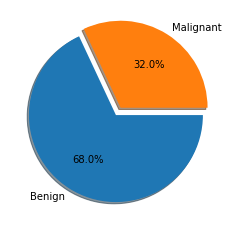

In [ ]:
#Let us first analyze the distribution of the target variable
target = 'label'
labels = ['Benign','Malignant']
features = [i for i in data.columns.values if i not in [target]]
MAP={}
for e, i in enumerate(sorted(data[target].unique())):
    MAP[i]=labels[e]
#MAP={0:'Not-Survived',1:'Survived'}
data1 = data.copy()
data1[target]=data1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(data1[target].value_counts(), labels=data1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

In [ ]:
import seaborn as sns

                                     Features Distribution                                      


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

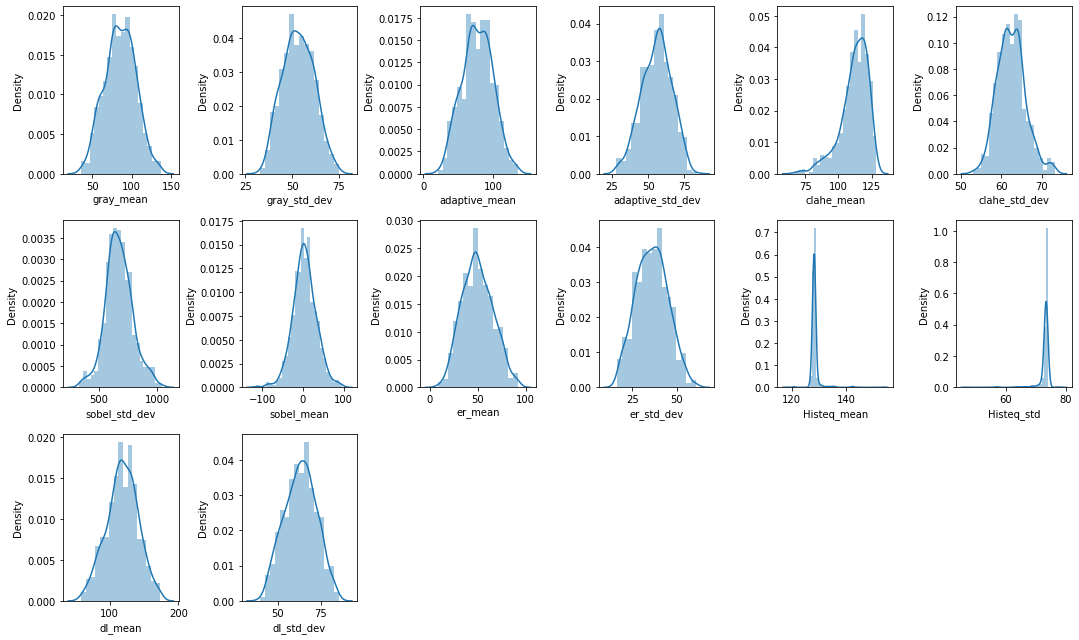

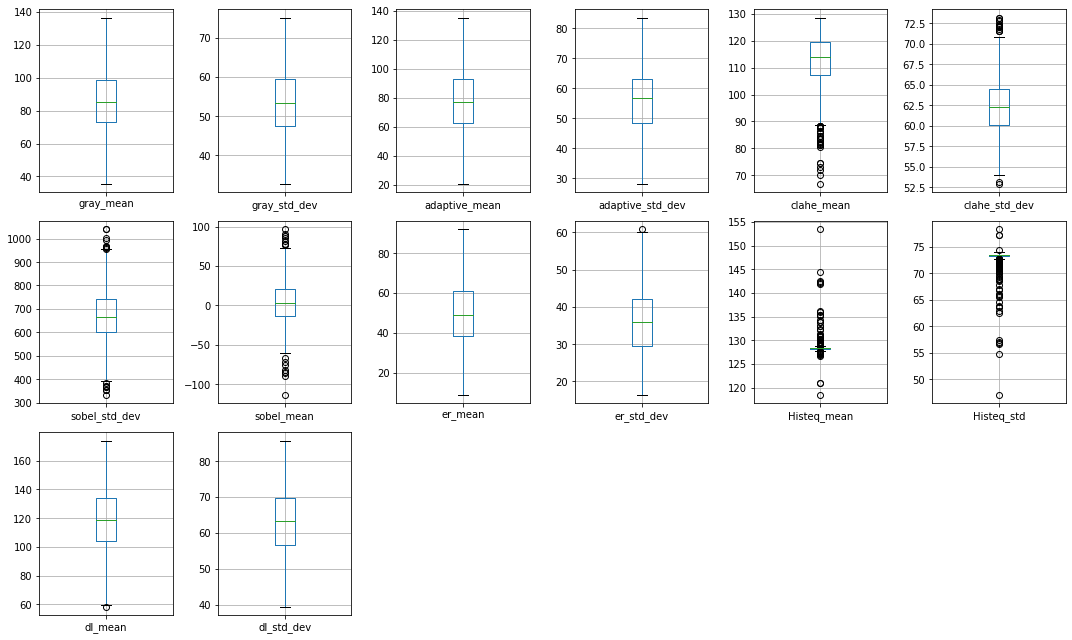

In [ ]:
import math
print('\033[1mFeatures Distribution'.center(100))
cf = []
#Checking number of unique rows in each feature

nu = data[features].nunique().sort_values()
nf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(data[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])
for i in range(data[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])
n=6
nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    sns.distplot(data[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    data.boxplot(nf[c])
plt.tight_layout()
plt.show()

In [ ]:
#Check for empty elements
nvc = pd.DataFrame(data1.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/data1.shape[0],3)*100
print(nvc)

                  Total Null Values  Percentage
gray_mean                         0         0.0
gray_std_dev                      0         0.0
adaptive_mean                     0         0.0
adaptive_std_dev                  0         0.0
clahe_mean                        0         0.0
clahe_std_dev                     0         0.0
sobel_std_dev                     0         0.0
sobel_mean                        0         0.0
er_mean                           0         0.0
er_std_dev                        0         0.0
Histeq_mean                       0         0.0
Histeq_std                        0         0.0
dl_mean                           0         0.0
dl_std_dev                        0         0.0
label                             0         0.0


In [ ]:
# Removal of outlier:
data2 = data1.copy()

for i in [i for i in data2.columns]:
    if data2[i].nunique()>=12:
        Q1 = data2[i].quantile(0.15)
        Q3 = data2[i].quantile(0.85)
        IQR = Q3 - Q1
        data2 = data2[data2[i] <= (Q3+(1.5*IQR))]
        data2 = data2[data2[i] >= (Q1-(1.5*IQR))]
data2 = data2.reset_index(drop=True)
display(data2.head())
print('\n\033[1mInference:\033[0m Before removal of outliers, The dataset had {} samples.'.format(data1.shape[0]))
print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(data2.shape[0]))

,gray_mean,gray_std_dev,adaptive_mean,adaptive_std_dev,clahe_mean,clahe_std_dev,sobel_std_dev,sobel_mean,er_mean,er_std_dev,Histeq_mean,Histeq_std,dl_mean,dl_std_dev,label
0,70.791931,48.299823,62.879089,49.766554,108.682739,62.276226,669.808753,10.833740,37.088318,25.860675,128.434204,73.271824,106.367188,64.291310,Benign
1,103.029175,56.943825,96.568176,60.609187,119.878357,62.012814,686.080745,14.801392,64.806885,41.265105,128.155884,73.607984,137.992615,64.899056,Benign
2,89.339111,67.947391,76.659180,76.030509,110.415588,59.230400,440.692354,26.064270,58.996704,53.967776,128.457275,72.978106,115.486328,75.792697,Benign
3,98.113159,55.591140,91.206604,58.062648,120.289307,63.873608,779.056169,69.495972,56.818787,38.812444,128.171204,73.484973,133.827637,62.116764,Benign
4,100.528931,57.147003,93.512634,61.009497,117.783813,62.524257,768.352665,-1.789062,60.226990,39.312144,128.103699,73.563143,135.428223,67.539455,Benign



Inference: Before removal of outliers, The dataset had 657 samples.
Inference: After removal of outliers, The dataset now has 588 samples.


In [ ]:
 from sklearn.model_selection import train_test_split
 import sklearn.metrics as metrics

In [ ]:
#Splitting the data intro training & testing sets
data = data2.copy()
X = data.drop([target],axis=1)
Y = data[target]
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=123)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',x_train.shape,y_train.shape,'\nTesting set   ---> ', x_test.shape,'', y_test.shape)

Original set  --->  (588, 14) (588,) 
Training set  --->  (470, 14) (470,) 
Testing set   --->  (118, 14)  (118,)


In [ ]:
#no of features
len(data.columns)

15

In [ ]:
# Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
std = StandardScaler()
print('\033[1mStandardardization on Training set'.center(100))
x_train = std.fit_transform(x_train)
X_train = pd.DataFrame(x_train, columns=X.columns)
display(X_train.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
x_test = std.transform(x_test)
X_test = pd.DataFrame(x_test, columns=X.columns)
display(X_test.describe())

                               Standardardization on Training set                               


,gray_mean,gray_std_dev,adaptive_mean,adaptive_std_dev,clahe_mean,clahe_std_dev,sobel_std_dev,sobel_mean,er_mean,er_std_dev,Histeq_mean,Histeq_std,dl_mean,dl_std_dev
count,4.700000e+02,4.700000e+02,4.700000e+02,4.700000e+02,4.700000e+02,4.700000e+02,4.700000e+02,4.700000e+02,4.700000e+02,4.700000e+02,4.700000e+02,4.700000e+02,4.700000e+02,4.700000e+02
mean,1.247229e-16,-5.858198e-17,1.965331e-16,-5.291276e-16,-5.933788e-16,-2.985791e-15,6.330633e-16,7.558965e-18,1.247229e-16,4.988917e-16,-2.277327e-14,5.712499e-14,1.511793e-17,-4.289713e-16
std,1.001066e+00,1.001066e+00,1.001066e+00,1.001066e+00,1.001066e+00,1.001066e+00,1.001066e+00,1.001066e+00,1.001066e+00,1.001066e+00,1.001066e+00,1.001066e+00,1.001066e+00,1.001066e+00
min,-2.282768e+00,-2.497975e+00,-2.196232e+00,-2.667639e+00,-3.052229e+00,-2.675129e+00,-2.788484e+00,-3.313387e+00,-2.145123e+00,-2.274664e+00,-4.019189e+00,-3.826432e+00,-2.574261e+00,-2.494903e+00
25%,-6.800508e-01,-7.216151e-01,-6.872375e-01,-6.925484e-01,-6.012532e-01,-7.432766e-01,-6.678483e-01,-6.124787e-01,-7.130156e-01,-7.574470e-01,-3.614051e-01,-4.593976e-01,-6.687223e-01,-7.379596e-01
50%,3.263777e-02,-9.889642e-03,6.598955e-02,8.603314e-02,1.204045e-01,-7.465849e-03,-7.352337e-02,-3.197460e-02,-7.509296e-02,9.775995e-03,1.116631e-01,1.785109e-01,4.753997e-03,1.987295e-02
75%,7.130623e-01,7.238634e-01,6.906865e-01,7.083000e-01,7.699212e-01,7.049055e-01,5.960132e-01,6.259406e-01,6.996284e-01,6.465413e-01,5.797173e-01,6.819962e-01,6.936559e-01,6.816150e-01
max,2.704599e+00,2.593109e+00,2.694182e+00,2.277816e+00,1.813238e+00,2.596636e+00,3.208615e+00,3.295780e+00,2.641881e+00,2.719444e+00,2.913952e+00,2.408901e+00,2.481501e+00,2.484845e+00



                                Standardardization on Testing set                                


,gray_mean,gray_std_dev,adaptive_mean,adaptive_std_dev,clahe_mean,clahe_std_dev,sobel_std_dev,sobel_mean,er_mean,er_std_dev,Histeq_mean,Histeq_std,dl_mean,dl_std_dev
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,-0.123111,-0.033293,-0.120522,-0.023869,-0.146097,0.090025,-0.066949,0.139965,-0.105411,-0.059384,-0.001978,-0.121110,-0.115007,0.032771
std,1.054203,1.071782,1.051601,1.016763,1.011639,0.993282,0.966422,1.063475,1.057619,1.062130,1.127175,1.133699,1.031737,0.996535
min,-2.427332,-2.164150,-2.430676,-2.644447,-4.219137,-3.038692,-3.095664,-2.832430,-2.482762,-2.274664,-2.917278,-4.068785,-2.743807,-2.301227
25%,-0.764584,-0.774469,-0.759192,-0.836471,-0.702452,-0.547983,-0.656319,-0.614137,-0.789948,-0.808354,-0.349576,-0.517651,-0.731402,-0.634525
50%,-0.197545,-0.021092,-0.180436,0.089658,-0.110989,0.009171,-0.092968,0.094124,-0.182430,0.028899,0.032607,0.062055,-0.232925,0.018577
75%,0.533393,0.809089,0.512679,0.706708,0.619727,0.822100,0.506277,0.754676,0.585335,0.752592,0.557617,0.598760,0.502362,0.748693
max,2.522942,2.652634,2.564244,2.656613,1.603467,2.611533,3.220755,3.068676,2.522250,2.807833,2.821850,1.954077,2.504563,2.175557


# Classification Algorithms.

Test Accuracy Score of Basic Logistics Regression: 77.97
              precision    recall  f1-score   support

      Benign       0.80      0.91      0.85        82
   Malignant       0.71      0.47      0.57        36

    accuracy                           0.78       118
   macro avg       0.75      0.69      0.71       118
weighted avg       0.77      0.78      0.77       118



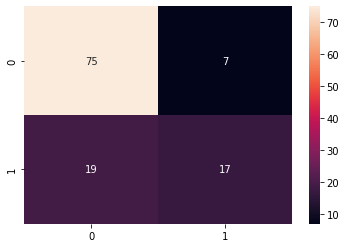

In [ ]:
## Applying Logistic Regression Algorithm 
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=0)
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
test_accuracy1 = round(accuracy_score(y_test, y_pred1) * 100, 2)
print('Test Accuracy Score of Basic Logistics Regression:',test_accuracy1)
conf1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(conf1, annot=True)
print(classification_report(y_test,y_pred1))

Test Accuracy Random Forest is : 78.8135593220339 %
              precision    recall  f1-score   support

      Benign       0.79      0.95      0.86        82
   Malignant       0.79      0.42      0.55        36

    accuracy                           0.79       118
   macro avg       0.79      0.68      0.70       118
weighted avg       0.79      0.79      0.77       118



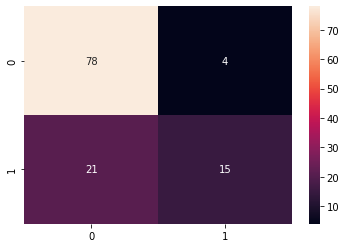

In [ ]:
## Applying Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators =100)
model.fit(x_train,y_train)
y_pred2 = model.predict(x_test)
print("Test Accuracy Random Forest is :",metrics.accuracy_score(y_pred2,y_test)*100,'%')
conf2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(conf2, annot=True)
print(classification_report(y_test,y_pred2))

Test Accuracy Score of KNN: 75.42
              precision    recall  f1-score   support

      Benign       0.77      0.93      0.84        82
   Malignant       0.68      0.36      0.47        36

    accuracy                           0.75       118
   macro avg       0.73      0.64      0.66       118
weighted avg       0.74      0.75      0.73       118



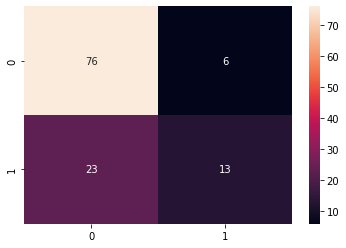

In [ ]:
## Applying KNN Algorithm 
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=9 , metric= 'minkowski' , p = 4)
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)
test_accuracy3 = round(accuracy_score(y_test, y_pred3) * 100, 2)
print('Test Accuracy Score of KNN:',test_accuracy3)
conf3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(conf3, annot=True)
print(classification_report(y_test,y_pred3))

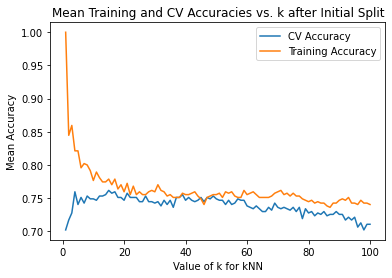

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

## Create helper function for plotting the training accuracy vs. 
## cross-validation accuracy plot with various k values
def k_acc_plot(start: int, end: int, X_t, y_t, method: str):
    ## Set k range and initialize lists
    k_range = range(start, end)
    k_scores = []
    train_acc = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_t, y_t)
        accuracy = accuracy_score(y_t, knn.predict(X_t))
        scores = cross_val_score(knn, X_t, y_t, cv=5, scoring='accuracy')
        k_scores.append(scores.mean())
        train_acc.append(accuracy.mean())

    ## Plot mean CV accuracies for k
    plt.title('Mean Training and CV Accuracies vs. k after ' + method)
    plt.plot(k_range, k_scores, label="CV Accuracy")
    plt.plot(k_range, train_acc, label="Training Accuracy")
    plt.legend()
    plt.xlabel('Value of k for kNN')
    plt.ylabel('Mean Accuracy')
    plt.show()

## Plot accuracies vs. k values
k_acc_plot(1, 101, x_train, y_train, "Initial Split")

In the plot, we can see that the training accuracy is way higher than the cross-validation accuracy when k is less than 10, which indicates that this is the area of overfitting where k is too small; such model will lead to poor testing performance. As k increases beyond 10, we can see the massive drop of both accuracies starting around 15-20, indicating the start of underfitting. Underfitting also leads to poor generalizability.

The sweet spot seems to be around k = 10 where there's overlap between the two accuracy curves and the cross-validation accuracy curve is at its apex.

In general, the models are prone to overfit when training accuracy is higher than CV accuracy, and underfit when both accuracies are low.

In [ ]:
## Find best k using GridSearchCV
from sklearn.model_selection import GridSearchCV

## Create a helper function for using GridSearchCV to check results
def gridsearch_check(start: int, end: int, X_t, y_t):
    knn = KNeighborsClassifier()
    param_grid = {'n_neighbors': np.arange(start, end)}
    knn_gscv = GridSearchCV(knn, param_grid, cv=5)
    knn_gscv.fit(X_t, y_t)
    print('Best k: ', knn_gscv.best_params_, ', Best score: ', knn_gscv.best_score_ * 100, "%")

## Run GridSearchCV to check results
gridsearch_check(1, 101, x_train, y_train)


Best k:  {'n_neighbors': 15} , Best score:  76.17021276595744 %


Test Accuracy Score of SVM : 80.51
              precision    recall  f1-score   support

      Benign       0.86      0.87      0.86        82
   Malignant       0.69      0.67      0.68        36

    accuracy                           0.81       118
   macro avg       0.77      0.77      0.77       118
weighted avg       0.80      0.81      0.80       118



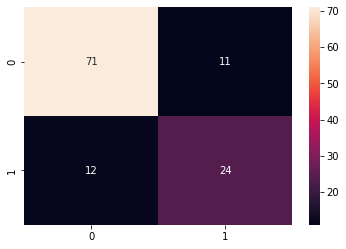

In [ ]:
from sklearn.svm import SVC, LinearSVC
model4 =SVC(C=100.0)

model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
test_accuracy4 = round(accuracy_score(y_test, y_pred4) * 100, 2)
print('Test Accuracy Score of SVM :',test_accuracy4)
conf4 = confusion_matrix(y_test, y_pred4)
sns.heatmap(conf4, annot=True)
print(classification_report(y_test,y_pred4))

#Improving svm

In [ ]:
#normalizing training dataset
min_train=x_train.min()
range_train=(x_train-min_train).max()
x_train_scaled=(x_train-min_train)/range_train

In [ ]:
#normalizing testing dataset
min_test=x_test.min()
range_test=(x_test-min_test).max()
x_test_scaled=(x_test-min_test)/range_test

In [ ]:
#training model with scaled data
model4.fit(x_train_scaled,y_train)

SVC(C=100.0)

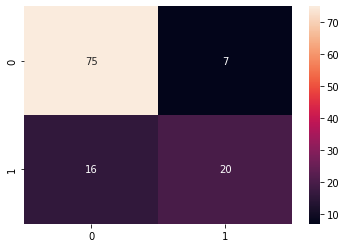

In [ ]:
y_predict1=model4.predict(x_test_scaled)
cm1=confusion_matrix(y_test,y_predict1)
sns.heatmap(cm1, annot=True)

In [ ]:
test_accuracyscaled = round(accuracy_score(y_test, y_predict1) * 100, 2)
print('Test Accuracy Score of SVM :',test_accuracyscaled)

Test Accuracy Score of SVM : 80.51


Test Accuracy Score of Decision Tree is : 73.73
              precision    recall  f1-score   support

      Benign       0.80      0.83      0.81        82
   Malignant       0.58      0.53      0.55        36

    accuracy                           0.74       118
   macro avg       0.69      0.68      0.68       118
weighted avg       0.73      0.74      0.73       118



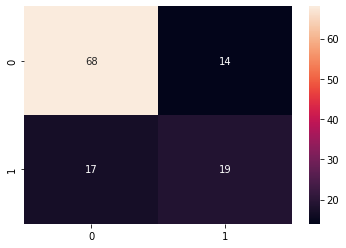

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier(criterion = 'gini')
model5.fit(x_train,y_train)
y_pred5 = model5.predict(x_test)
test_accuracy5 = round(accuracy_score(y_test, y_pred5) * 100, 2)
print('Test Accuracy Score of Decision Tree is :',test_accuracy5)
conf5 = confusion_matrix(y_test, y_pred5)
sns.heatmap(conf5, annot=True)
print(classification_report(y_test,y_pred5))

In [ ]:
model = DecisionTreeClassifier(class_weight='balanced')
from sklearn.model_selection import RepeatedStratifiedKFold
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

Test Accuracy Score of Decision Tree is : 75.42
              precision    recall  f1-score   support

      Benign       0.83      0.83      0.83        82
   Malignant       0.61      0.61      0.61        36

    accuracy                           0.76       118
   macro avg       0.72      0.72      0.72       118
weighted avg       0.76      0.76      0.76       118



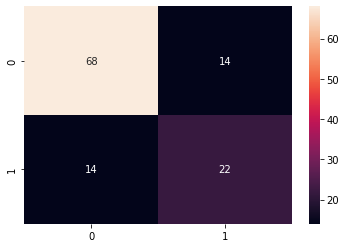

In [ ]:
model.fit(x_train,y_train)
y_predDTimp = model.predict(x_test)
test_accuracy_DTimp = round(accuracy_score(y_test, y_predDTimp) * 100, 2)
print('Test Accuracy Score of Decision Tree is :',test_accuracy5)
confDTimp = confusion_matrix(y_test, y_predDTimp)
sns.heatmap(confDTimp, annot=True)
print(classification_report(y_test,y_predDTimp))

Test Accuracy Score of Naive Bayes: 59.32
              precision    recall  f1-score   support

      Benign       0.74      0.63      0.68        82
   Malignant       0.38      0.50      0.43        36

    accuracy                           0.59       118
   macro avg       0.56      0.57      0.56       118
weighted avg       0.63      0.59      0.61       118



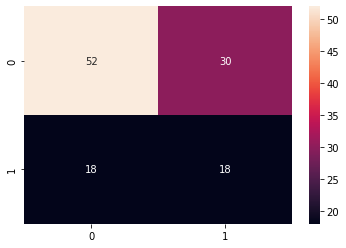

In [ ]:
## Applying Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
model6 = GaussianNB()
model6.fit(x_train,y_train)
y_pred6 = model6.predict(x_test)
test_accuracy6 = round(accuracy_score(y_test, y_pred6) * 100, 2)
print('Test Accuracy Score of Naive Bayes:',test_accuracy6)
conf6 = confusion_matrix(y_test, y_pred6)
sns.heatmap(conf6, annot=True)
print(classification_report(y_test,y_pred6))